# Logistic regression

In [6]:
from util.functions import impute_and_train
from sklearn.linear_model import LogisticRegression
import pandas as pd

df_numeric = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, LogisticRegression, {'max_iter': 10000})

    

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

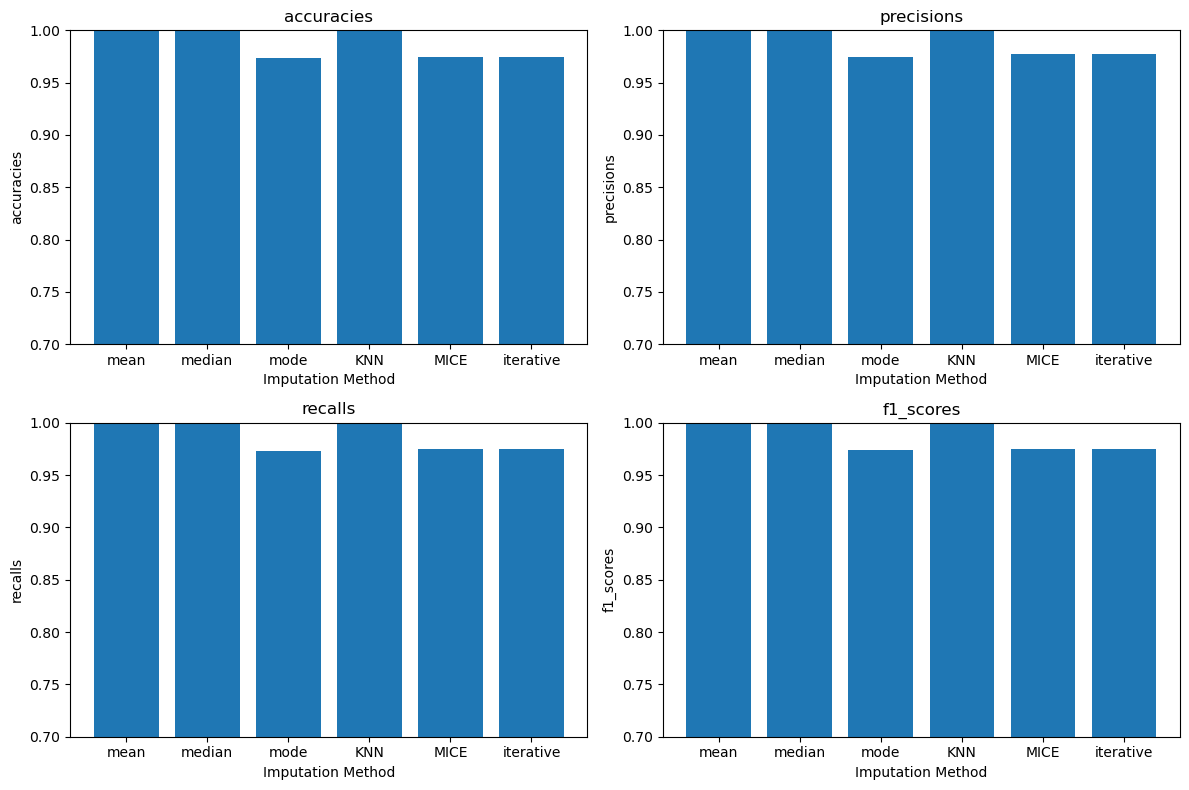

In [7]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


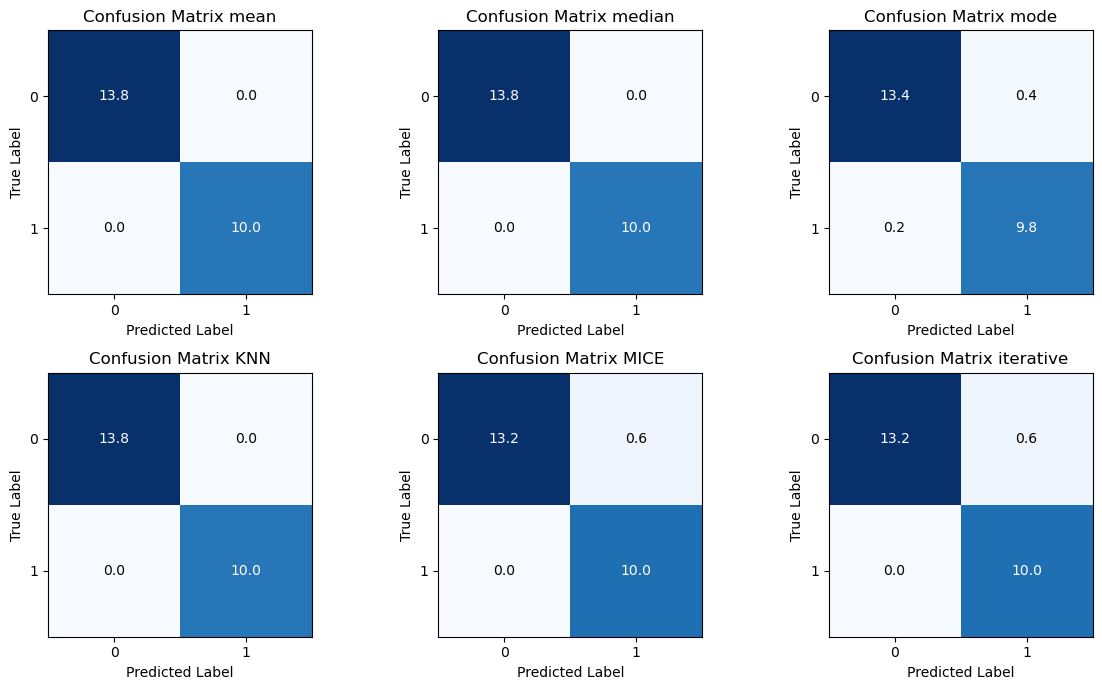

In [8]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

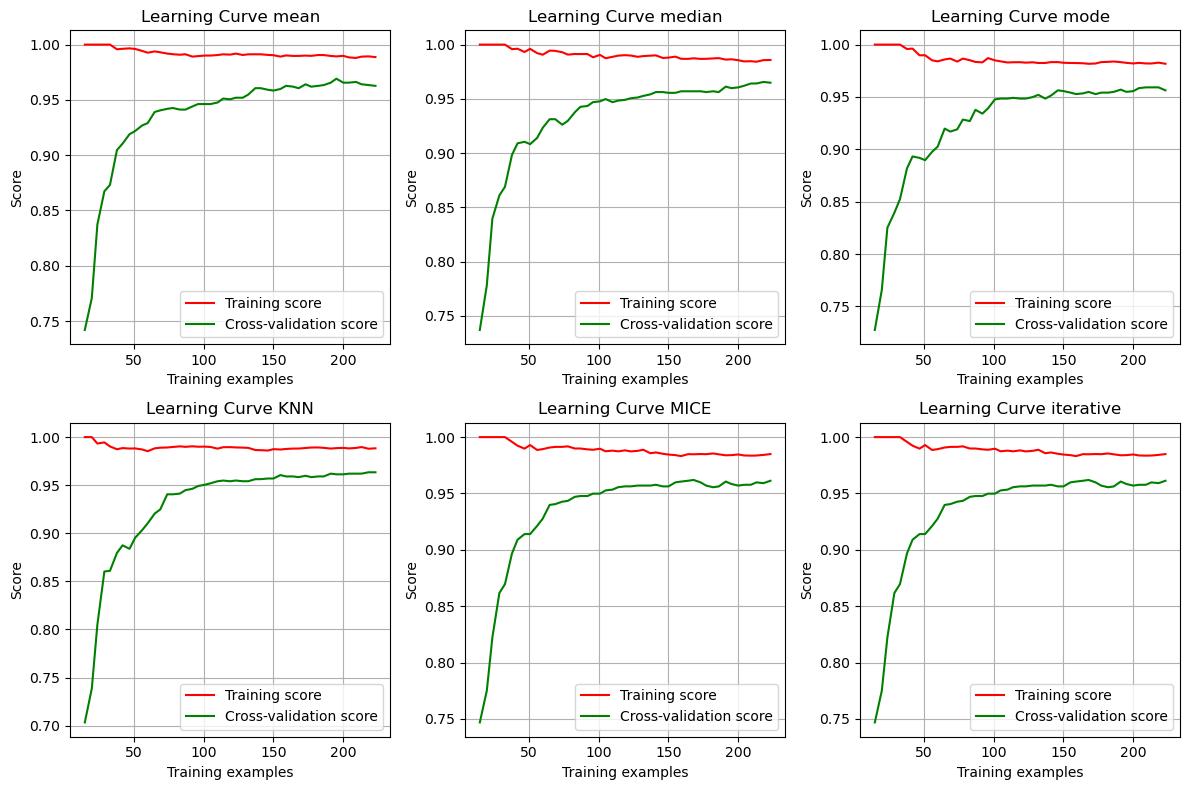

In [9]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

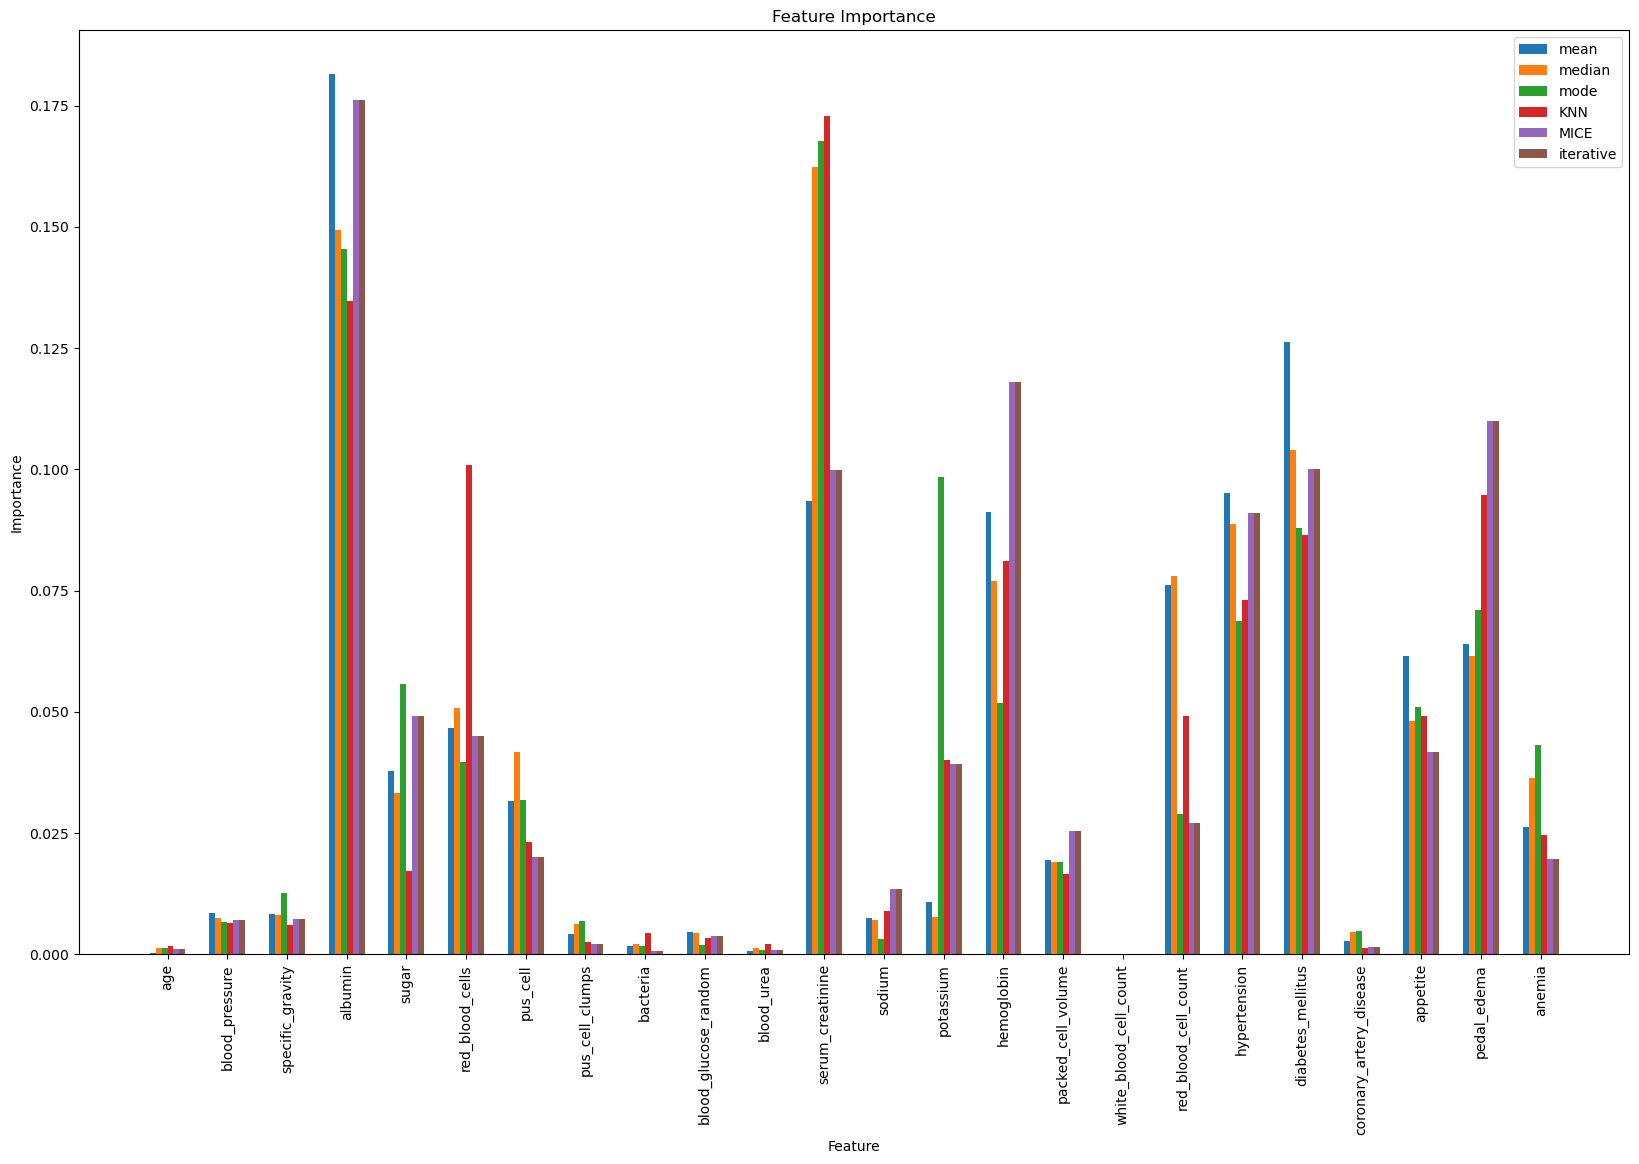

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from util.functions import plot_feature_importances
import numpy as np
# plot all feature importances as subplots
feature_importances = {}
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances_df = pd.DataFrame(columns=df_numeric.drop(columns=['class']).columns, index=pd.MultiIndex.from_product([results['models'].keys(), range(5)], names=['imputation', 'iteration']))

for (name, models) in results['models'].items():
    norm_coeff = []
    for i, model in enumerate(models):
        coefficients = model.coef_[0]
        # Take the absolute values
        abs_coefficients = abs(coefficients)

        # Normalize the absolute coefficients
        scaler = MinMaxScaler()
        coefficients = scaler.fit_transform(abs_coefficients.reshape(-1, 1)).flatten()
        normalized_coefficients = coefficients / coefficients.sum()
        norm_coeff.append(normalized_coefficients)
        feature_importances_df.loc[(name, i)] = normalized_coefficients


    feature_importances[name] = pd.DataFrame({'Importance': np.mean(norm_coeff, axis=0)}, index=df_numeric.drop(columns=['class']).columns)

feature_importances_df.to_csv('results/feature_importances_logistic_regression.csv', index=True)
plot_feature_importances(feature_importances)